<a href="https://colab.research.google.com/github/Shanz1465/Sesi-n-6-Python-Machine-Learning-Redes-neuronales/blob/main/Clase_6_Python_Con_Datos_Atmosfericos_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Carga de datos
from google.colab import files



In [4]:
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DatosAzcapo.txt", sep=',', header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52179 entries, 0 to 52178
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       52179 non-null  object 
 1   1       52179 non-null  object 
 2   2       52179 non-null  float64
 3   3       52179 non-null  float64
 4   4       52179 non-null  float64
 5   5       52179 non-null  float64
 6   6       52179 non-null  float64
 7   7       52179 non-null  float64
 8   8       52179 non-null  float64
 9   9       52179 non-null  float64
 10  10      52179 non-null  float64
 11  11      52179 non-null  float64
 12  12      52179 non-null  float64
dtypes: float64(11), object(2)
memory usage: 5.2+ MB


In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,4/4/2024 12:00:00 AM,4/4/2024 6:00:00 AM,28.692070,14.742066,13.950004,23.128830,19.350910,77.827011,28.035599,25.874756,33.960640,11.665325,5.025064
1,4/4/2024 12:01:00 AM,4/4/2024 6:01:00 AM,32.022658,14.771019,17.251640,23.148970,19.340763,77.817986,27.919699,25.910034,33.966431,11.671605,5.068029
2,4/4/2024 12:02:00 AM,4/4/2024 6:02:00 AM,32.219123,14.717249,17.501873,23.169109,19.335342,77.820869,27.938000,25.910950,33.988586,11.663702,5.003208
3,4/4/2024 12:03:00 AM,4/4/2024 6:03:00 AM,31.586301,14.659344,16.926957,23.169109,19.330561,77.814812,27.956299,25.925995,33.997185,11.670901,4.931069
4,4/4/2024 12:04:00 AM,4/4/2024 6:04:00 AM,32.534500,14.676922,17.857577,23.199320,19.308531,77.830132,27.956299,25.948059,34.013283,11.678738,5.000206


In [9]:
df['fechas']=pd.to_datetime(df[0])
df=df.set_index('fechas')

<ipython-input-9-f5f18913dd5c>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['fechas']=pd.to_datetime(df[0])


In [10]:
PM10  = df[2]
PM25  = df[3]
PMmix = df[4]
temp  = df[6]
Pres  = df[7]
RH    = df[8]


In [11]:
variable=["$PM_{10}$",'$PM_{2.5}$', '$PM_{mix}$', 'T', 'P', 'RH',]
colors= ['black','red', 'blue', 'green', 'orange', 'brown']

In [14]:
def plot_var(var,index,lim_min, lim_max):
  plt.figure(figsize=(15,2))
  plt.plot(var.iloc[lim_min:lim_max], color=colors[index], label=variable[index])
  plt.xlabel('Tiempo', fontsize=12)
  plt.ylabel(f'{variable[index]}', fontsize=12)
  plt.legend()
  plt.grid(True)
  plt.show()


52179


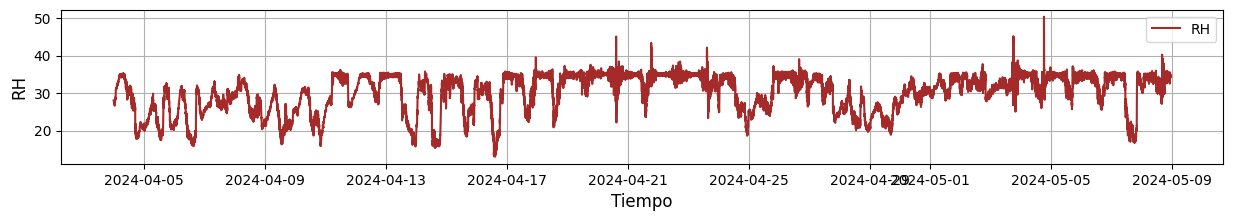

In [15]:
print(len(df))
index=5
plot_var(RH, index,0,50000)

In [16]:
# Coeficiente de asimetria de Fisher

df.skew(numeric_only=True)

,0
2,2.627921
3,0.689481
4,3.799422
5,1.763857
6,0.178861
7,0.272153
8,-0.895409
9,0.437827
10,1.702012
11,0.561093


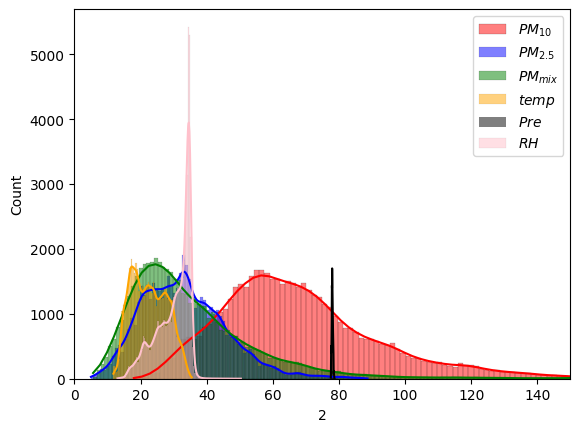

In [30]:
sns.histplot(PM10, color='red', label='$PM_{10}$',kde=True) #kde=True añade un curva de densidad
sns.histplot(PM25, color='blue', label='$PM_{2.5}$',kde=True)
sns.histplot(PMmix, color='green', label='$PM_{mix}$',kde=True)
sns.histplot(temp, color='orange', label='$temp$',kde=True)
sns.histplot(Pres, color='black', label='$Pre$',kde=True)
sns.histplot(RH, color='pink', label='$RH$',kde=True)
plt.xlim(0,150)
plt.legend(loc='upper right')
plt.show()

In [20]:
df.kurt(numeric_only=True)

,0
2,17.602749
3,0.728258
4,28.249759
5,2.810165
6,-0.996193
7,-0.165019
8,-0.111215
9,6.155148
10,2.888641
11,46.158682


In [28]:
# calcular la correlación
correlation0 = df[3].corr(df[2], method='spearman')
correlation1 = df[3].corr(df[4], method='spearman')
correlation2 = df[3].corr(df[6], method='spearman')
correlation3 = df[3].corr(df[7], method='spearman')
correlation4 = df[3].corr(df[8], method='spearman')

print(f'Correlación PM2.5 y PM10: {correlation0}')
print(f'Correlación PM2.5 y PMmix: {correlation1}')
print(f'Correlación PM2.5 y temp: {correlation2}')
print(f'Correlación PM2.5 y Press: {correlation3}')
print(f'Correlación PM2.5 y RH: {correlation4}')


Correlación PM2.5 y PM10: 0.6628288269857316
Correlación PM2.5 y PMmix: 0.19378730709920722
Correlación PM2.5 y temp: 0.03153504569097056
Correlación PM2.5 y Press: 0.005900923429563776
Correlación PM2.5 y RH: 0.415282630428508


In [33]:
# Cargamos los datos que usaremos para el ejemplo

Data_in = np.column_stack([temp, Pres, RH]) # para generar un modelo de prediccion de PM25; , PM10
Data_out = np.column_stack([PM25])
print(len(Data_in))
print(len(Data_out))

52179
52179


In [34]:
# Generacion de modelos de redes neuronales

Data_in.shape[1]

3

In [35]:
# crear modelo de Tensorflow
# definir el modelo secuencial
model= tf.keras.Sequential([
    tf.keras.layers.Dense(3, activation='linear', input_shape=(Data_in.shape[1],)),
    tf.keras.layers.Dense(1, activation= 'linear')
     ])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
# Resumen del modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16 (64.00 B)

 Trainable params: 16 (64.00 B)

 Non-trainable params: 0 (0.00 B)

In [37]:
# Division  de los conjuntos de datos

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Data_in, Data_out,test_size=0.2,random_state=42)

In [38]:
print(Data_in[:5])
print(X_train[:5])

[[19.35091019 77.82701111 28.03559875]
 [19.34076309 77.81798553 27.91969872]
 [19.33534241 77.82086945 27.93799973]
 [19.33056068 77.81481171 27.95629883]
 [19.30853081 77.83013153 27.95629883]]
[[24.13035774 77.91934967 29.98759842]
 [16.16941452 78.06840515 21.11209869]
 [27.22885513 77.9575119  29.09699821]
 [13.59325886 78.20446777 34.78219986]
 [23.71559715 78.21208191 27.52319908]]


In [39]:
train_split =int(0.7*len(Data_in))

print(train_split)

X_train, y_train = Data_in[0:train_split], Data_out[0:train_split]
X_test, y_test = Data_in[train_split:len(Data_in)], Data_out[train_split:len(Data_in)]

36525


In [40]:
print(Data_in[0:train_split])
X_train

[[19.35091019 77.82701111 28.03559875]
 [19.34076309 77.81798553 27.91969872]
 [19.33534241 77.82086945 27.93799973]
 ...
 [29.00280762 77.82491302 22.10029984]
 [29.18952942 77.82133484 22.28939819]
 [29.4770565  77.81024933 23.02749825]]


array([[19.35091019, 77.82701111, 28.03559875],
       [19.34076309, 77.81798553, 27.91969872],
       [19.33534241, 77.82086945, 27.93799973],
       ...,
       [29.00280762, 77.82491302, 22.10029984],
       [29.18952942, 77.82133484, 22.28939819],
       [29.4770565 , 77.81024933, 23.02749825]])